In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [5]:
df.shape

(10841, 13)

there are some missing values in the dataset. Data is non numeric.

In [6]:
df['Reviews'].str.isnumeric().sum()

10840

In [7]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
##Replacing the values
df['Reviews'] = df['Reviews'].str.replace('3.0M','3000000')

<ipython-input-8-6886a0bf092d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('3.0M','3000000')


In [9]:
df['Reviews'] = df['Reviews'].astype('int')

In [10]:
df.drop(index=10472,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [11]:
df.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [12]:
def convert_size(size):
  if 'M' in size:
    return int(float(size.replace('M',''))*1000)
  elif 'k' in size:
    return float(size.replace('k',''))
  elif 'Varies with device' in size:
    return np.nan
  else:
    return np.nan

In [13]:
df['Size']=df['Size'].apply(convert_size)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [14]:
cols = ['Price']
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,' ')

<ipython-input-14-797e3f9ccc6d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i] =df[i].str.replace(j,' ')


In [15]:
cols = ['Installs']
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,' ')

<ipython-input-15-a6b7ff92622f>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i] =df[i].str.replace(j,' ')


In [16]:
df['Price'].unique()

array(['0', ' 4.99', ' 3.99', ' 6.99', ' 1.49', ' 2.99', ' 7.99', ' 5.99',
       ' 3.49', ' 1.99', ' 9.99', ' 7.49', ' 0.99', ' 9.00', ' 5.49',
       ' 10.00', ' 24.99', ' 11.99', ' 79.99', ' 16.99', ' 14.99',
       ' 1.00', ' 29.99', ' 12.99', ' 2.49', ' 10.99', ' 1.50', ' 19.99',
       ' 15.99', ' 33.99', ' 74.99', ' 39.99', ' 3.95', ' 4.49', ' 1.70',
       ' 8.99', ' 2.00', ' 3.88', ' 25.99', ' 399.99', ' 17.99',
       ' 400.00', ' 3.02', ' 1.76', ' 4.84', ' 4.77', ' 1.61', ' 2.50',
       ' 1.59', ' 6.49', ' 1.29', ' 5.00', ' 13.99', ' 299.99', ' 379.99',
       ' 37.99', ' 18.99', ' 389.99', ' 19.90', ' 8.49', ' 1.75',
       ' 14.00', ' 4.85', ' 46.99', ' 109.99', ' 154.99', ' 3.08',
       ' 2.59', ' 4.80', ' 1.96', ' 19.40', ' 3.90', ' 4.59', ' 15.46',
       ' 3.04', ' 4.29', ' 2.60', ' 3.28', ' 4.60', ' 28.99', ' 2.95',
       ' 2.90', ' 1.97', ' 200.00', ' 89.99', ' 2.56', ' 30.99', ' 3.61',
       ' 394.99', ' 1.26', ' 1.20', ' 1.04'], dtype=object)

In [17]:
df['Installs'].unique()

array(['10 000 ', '500 000 ', '5 000 000 ', '50 000 000 ', '100 000 ',
       '50 000 ', '1 000 000 ', '10 000 000 ', '5 000 ', '100 000 000 ',
       '1 000 000 000 ', '1 000 ', '500 000 000 ', '50 ', '100 ', '500 ',
       '10 ', '1 ', '5 ', '0 ', '0'], dtype=object)

In [18]:
cols = ['Installs']
chars_to_remove=[' ']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,'')

In [19]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [20]:
#we convert install and price into respective data type
df['Installs']=df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [22]:
df['Last Updated'] =pd.to_datetime(df['Last Updated'])
df['day'] =df['Last Updated'].dt.day
df['month'] =df['Last Updated'].dt.month
df['year'] =df['Last Updated'].dt.year

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [24]:
# remove th duplicate item in a column
df.drop_duplicates(subset=['App'],keep='last',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


Scatterplot to visualise the relationship between the size of the app and its rating

Text(0, 0.5, 'Rating')

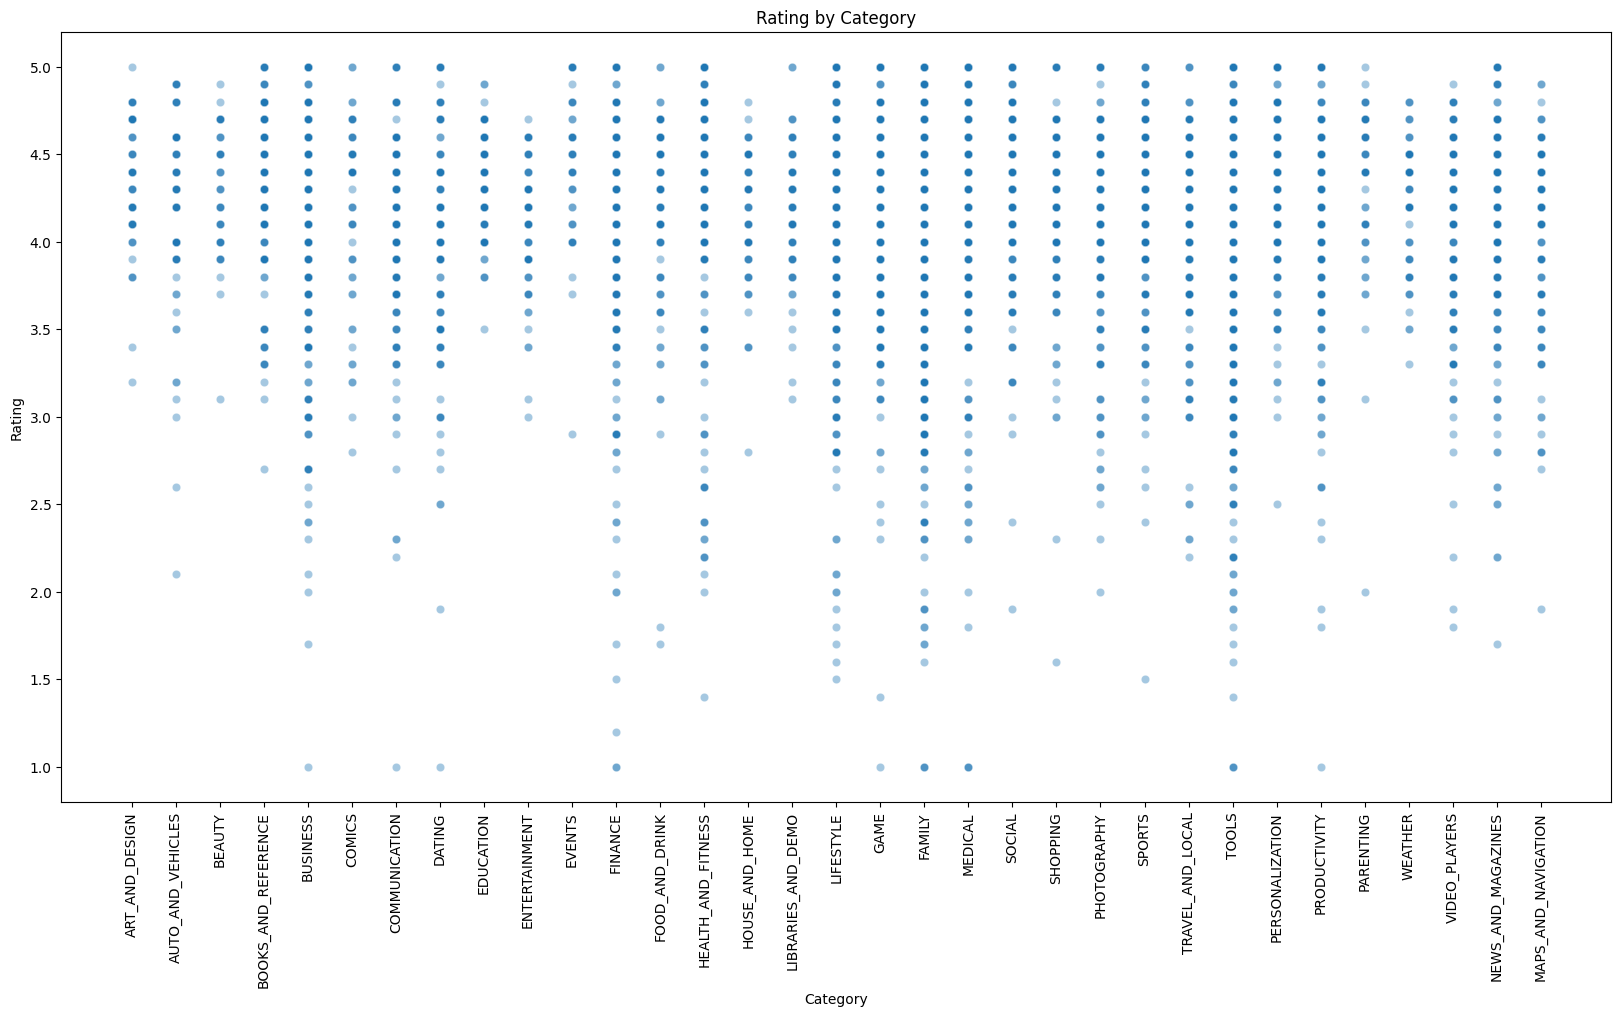

In [25]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Category'], y=df['Rating'], alpha=0.4)
plt.xticks(rotation=90)
plt.title('Rating by Category')
plt.xlabel('Category')
plt.ylabel('Rating')

boxplot to compare the ratings of different app categories

<ipython-input-26-93c2479398c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')


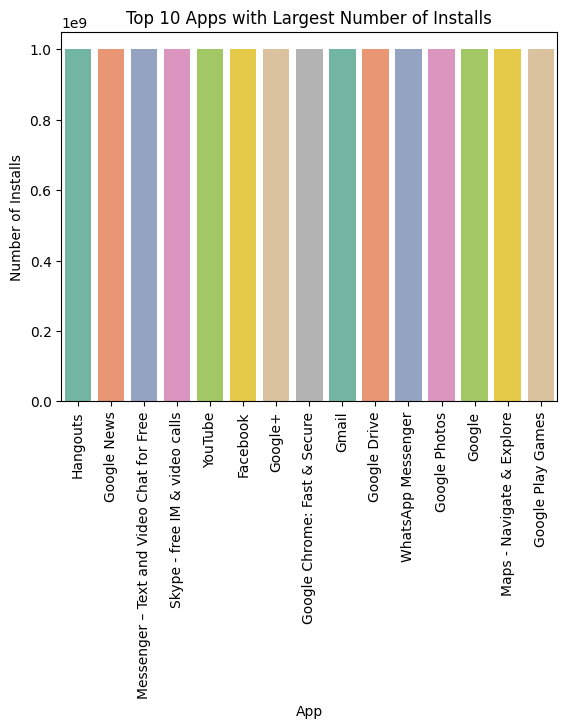

In [26]:
df_top10 = df.sort_values(by='Installs', ascending=False).head(15)
sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')
plt.xticks(rotation=90)
plt.ylabel('Number of Installs')
plt.title('Top 10 Apps with Largest Number of Installs')
plt.show()

Text(0.5, 1.0, 'Top 10 Sizes - Bar Plot')

<Figure size 1200x600 with 0 Axes>

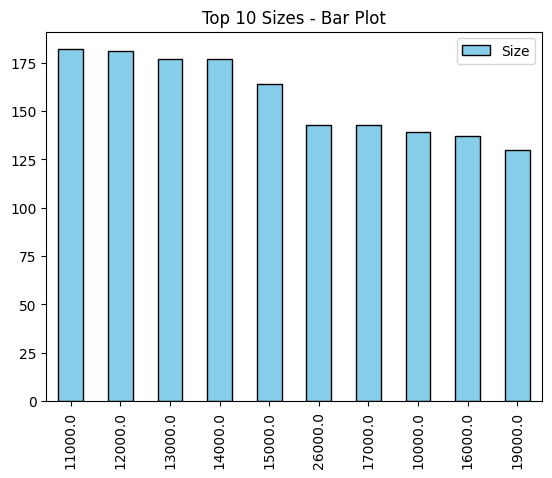

In [27]:
df_app_size = df['Size'].value_counts().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12, 6))
df_app_size.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Sizes - Bar Plot')

Bar chart to compare prices by app type

Text(0, 0.5, 'Average Price')

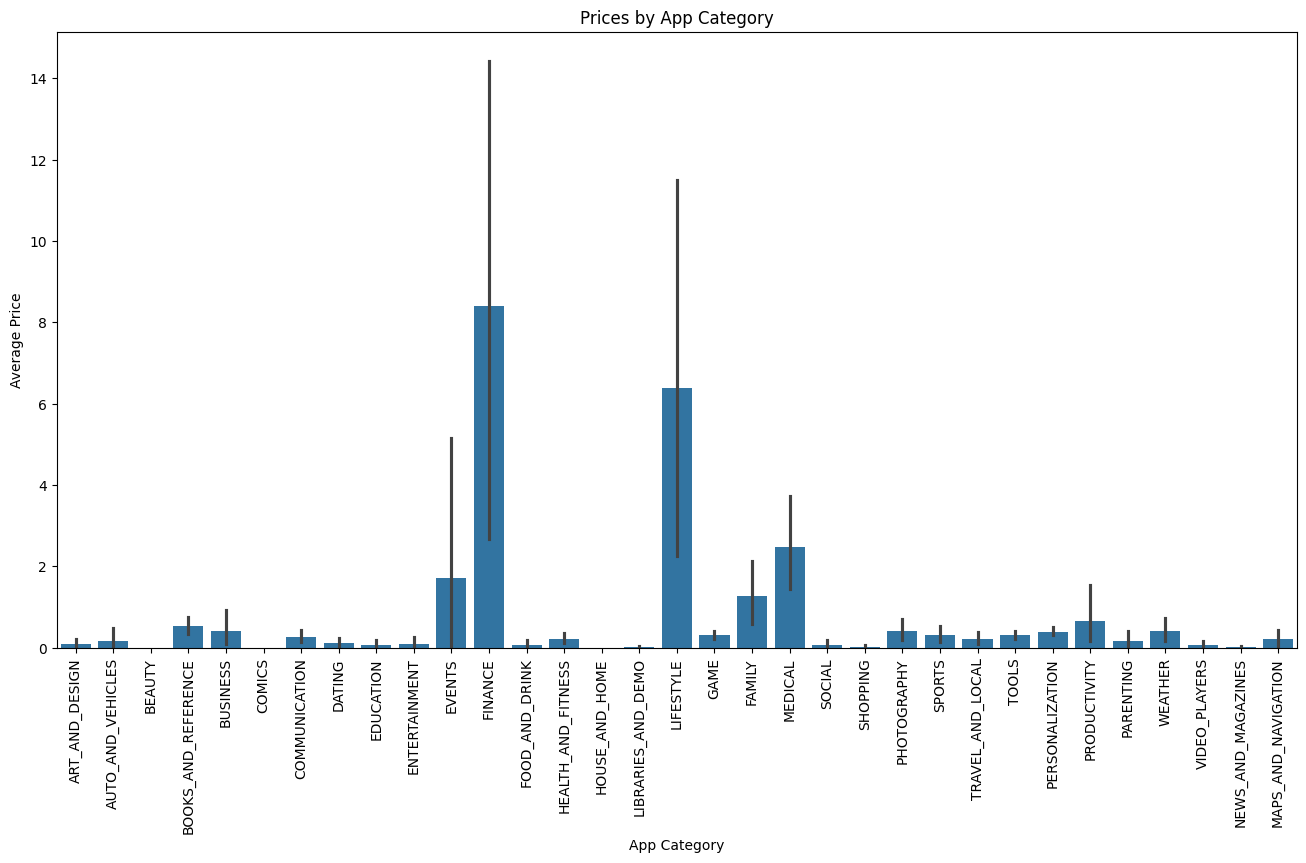

In [28]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Category', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Prices by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Price')

Top 10 most popular apps in the dataset

<ipython-input-29-81466f768b04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')


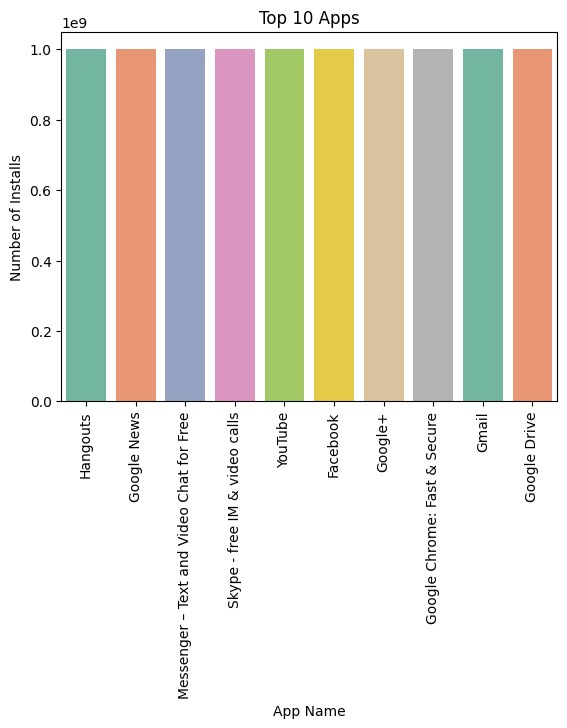

In [29]:
df_top10 = df.sort_values(by='Installs', ascending=False).head(10)
sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Number of Installs')
plt.title('Top 10 Apps')
plt.show()

##A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

Initially, my priority would be to clean the data, addressing null values and numeric inconsistencies, as we have done previously. Following this, I would proceed to:

- Generate a bar chart to compare the distribution of free and paid apps within each category.
- Utilize heatmaps to visually represent patterns in installs, reviews, and ratings.

##A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

- Quantity of installations (Utilize a bar chart or pie chart to display the distribution of total installs for leading developers).
- Evaluations (Employ a box plot or bar chart to depict the distribution of average ratings).
- App size (Create a scatter plot to illustrate the distribution of total reviews).
- App version
- Time trends (Implement time series line charts or area charts to discern trends across time).

##A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

- Explore installs trend with a time series chart.
- Track app updates over time with a line chart.
- Visualize seasonal installs with a chart.
- Analyze average ratings with a time series chart.
- Review reviews trend with a chart.
- Present daily metrics with a bar chart or heatmap.
- Illustrate installs evolution for each app category over time.
- Compare key metrics for competitors over time.
- Examine user engagement metrics relationship over time.
- Highlight significant dates on relevant charts.